In [1]:
import pycaret
pycaret.__version__

'3.2.0'

In [8]:
import pandas as pd
data = pd.read_csv('current.csv')

In [3]:
# data type check
data['Price'].dtype

dtype('float64')

In [4]:
from pycaret.regression import *
s = setup(data, target='Price')

,Description,Value
0,Session id,2044
1,Target,Price
2,Target type,Regression
3,Original data shape,"(16681, 19)"
4,Transformed data shape,"(16681, 78)"
5,Transformed train set shape,"(11676, 78)"
6,Transformed test set shape,"(5005, 78)"
7,Numeric features,1
8,Categorical features,17
9,Rows with missing values,12.8%


In [5]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [55]:
type(exp)

pycaret.regression.oop.RegressionExperiment

In [6]:
exp.setup(data, target='Price')

,Description,Value
0,Session id,5269
1,Target,Price
2,Target type,Regression
3,Original data shape,"(16681, 19)"
4,Transformed data shape,"(16681, 76)"
5,Transformed train set shape,"(11676, 76)"
6,Transformed test set shape,"(5005, 76)"
7,Numeric features,1
8,Categorical features,17
9,Rows with missing values,12.8%


In [7]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,10796.9839,675349555.2000,24690.8820,0.5681,0.4413,0.4089,0.0990
et,Extra Trees Regressor,13520.7652,1045594096.9618,31507.5495,0.2894,0.5663,0.5695,0.9040
lr,Linear Regression,14030.0912,1082037409.8088,32131.3056,0.2590,0.5954,0.5933,0.2370
ridge,Ridge Regression,14036.1794,1083045850.1310,32146.7093,0.2583,0.5959,0.5937,0.0650
lasso,Lasso Regression,14036.5267,1083462811.5524,32153.3895,0.2580,0.5961,0.5938,0.2070
llar,Lasso Least Angle Regression,14036.5251,1083463026.9041,32153.3931,0.2580,0.5961,0.5938,0.0650
lightgbm,Light Gradient Boosting Machine,13689.7397,1088596277.1152,32232.7759,0.2535,0.5692,0.5627,0.4530
en,Elastic Net,13955.4968,1098683767.2548,32386.9442,0.2469,0.6118,0.5919,0.0770
gbr,Gradient Boosting Regressor,13784.7544,1102148094.0730,32421.9092,0.2456,0.5832,0.5864,0.4520
br,Bayesian Ridge,14085.3441,1108058131.9630,32542.6946,0.2392,0.6181,0.6022,0.0790


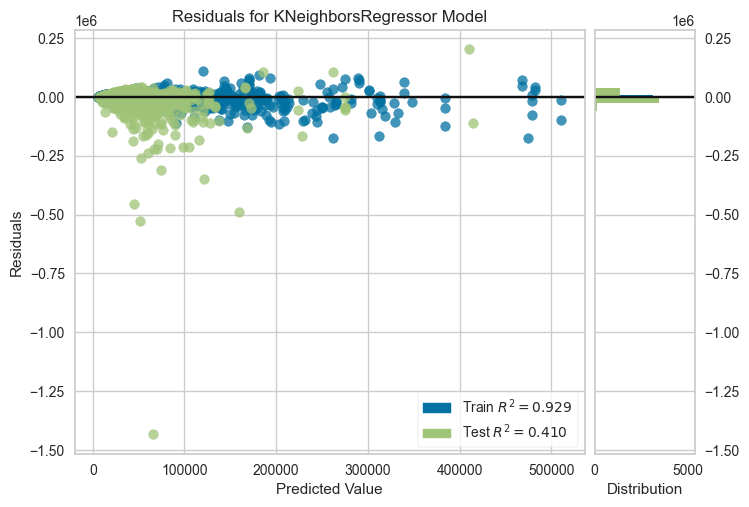

In [58]:
plot_model(best, plot = 'residuals')

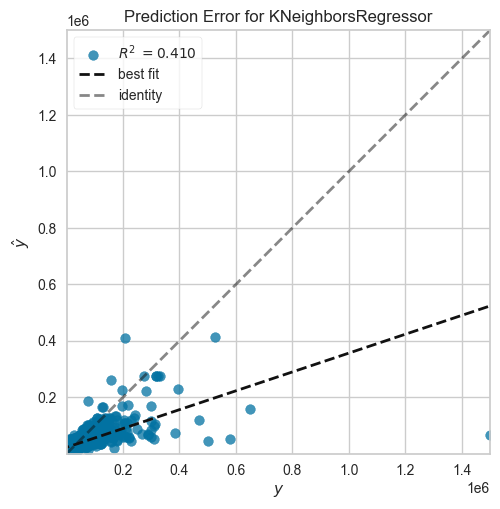

In [64]:
plot_model(best, plot = 'error')

In [65]:
# plot feature importance
plot_model(best, plot = 'feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [67]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [59]:
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,10569.2031,973868288.0000,31206.8633,0.4099,0.4362,0.4475


In [75]:
holdout_pred.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,prediction_label
15195,GWM,2023.0,Haval,NEW Available to order,2023 GWM Haval Jolion Vanta,NEW,Automatic,"4 cyl, 1.5 L",Front,Premium,8.1 L / 100 km,- / -,7 years / Unlimited km,NaN,4 cyl,SUV,4 Doors,5 Seats,34990.0,38290.000000
1697,BMW,2016.0,X5,SUV,2016 BMW X5 Xdrive 25D,USED,Automatic,"4 cyl, 2 L",AWD,Diesel,6 L / 100 km,180013,Grey / Black,"Mount Druitt, NSW",4 cyl,SUV,4 Doors,5 Seats,34990.0,41590.398438
4385,Toyota,2021.0,Hilux,Ute / Tray,2021 Toyota Hilux Rogue (4X4),USED,Automatic,"4 cyl, 2.8 L",4WD,Diesel,8.4 L / 100 km,60752,Black / 2Lle21,"Albion Park, NSW",4 cyl,Ute / Tray,4 Doors,5 Seats,68990.0,66390.000000
13772,Nissan,2018.0,Navara,Ute / Tray,2018 Nissan Navara ST (4X2),USED,Manual,"4 cyl, 2.3 L",Rear,Diesel,6.3 L / 100 km,55100,White / -,"Jandakot, WA",4 cyl,Ute / Tray,4 Doors,5 Seats,31993.0,32370.599609
4979,Jeep,2015.0,Grand,SUV,2015 Jeep Grand Cherokee Limited (4X4),USED,Automatic,"6 cyl, 3 L",4WD,Diesel,7.5 L / 100 km,127382,Black / Grey,"Edgeworth, NSW",6 cyl,SUV,4 Doors,5 Seats,35990.0,22245.199219


In [62]:
new_data = data.copy()
new_data.drop('Price', axis=1, inplace=True)
new_data.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats


In [70]:
predictions = predict_model(best, data = new_data)
predictions.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,prediction_label
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,48252.000000
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,26233.000000
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,91645.203125
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,35373.601562
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,32556.199219


In [74]:
plot_model(predictions, kind='scatter', x='Label', y='Score')

TypeError: plot_model() got an unexpected keyword argument 'kind'